In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [169]:
volts = np.arange(20,0,-1)
dados = pd.DataFrame({ # é os tempos
    "primeira gravação": np.array([0,.49,.99,1.87,2.24,2.43,2.93,3.71,4.48,5.27,6,6.32,7.89,8.74,9.92,12.10,15.4,16.4,17.76,25.88]),
    "segunda gravação": np.array([0,0.72,1.38,1.50,1.92,2.55,3.19,3.98,4.74,5.30,6.87,7.49,8.70,9.40,10.37,12.50,14.33,16.55,19.93,27.32]),
    "terceira gravação": np.array([0,.48,.88,1.52,2.23,2.90,3.26,3.86,4.74,5.28,6.06,6.80,8.05,9.14,10.39,11.33,13.99,16.76,20.03,26.65]),
    "quarta gravação": np.array([0,0.73,1.05,1.35,2.06,2.49,3.28,3.91,4.64,5.44,6.28,7.04,7.68,8.94,10.32,11,13.71,16.62,20.14,26.94]),
    "quinta gravação": np.array([0,0.72,1.20,1.74,2.27,2.78,3.46,3.94,4.84,5.50,6.38,7.12,8,9.58,10.73,12.25,14.40,16.73,20.20,26.58])
},index = volts)

In [142]:
volts

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1])

In [143]:
media = dados.mean(axis=1) # faz a operação para cada linhas

In [144]:
media

20     0.000
19     0.628
18     1.100
17     1.572
16     2.144
15     2.630
14     3.224
13     3.880
12     4.688
11     5.358
10     6.318
9      6.954
8      8.064
7      9.160
6     10.346
5     11.836
4     14.366
3     16.612
2     19.612
1     26.674
dtype: float64

In [145]:
tempo = np.array([media]).T

In [146]:
mediaerr = dados.std(axis=1)

In [147]:
mediaerr = np.array([mediaerr.values]).T

In [148]:
mediaerr

array([[0.        ],
       [0.13065221],
       [0.19455076],
       [0.22687001],
       [0.14976648],
       [0.20087309],
       [0.1921718 ],
       [0.10464225],
       [0.13608821],
       [0.10497619],
       [0.34557199],
       [0.43241184],
       [0.38292297],
       [0.33882149],
       [0.28814927],
       [0.63971087],
       [0.64096022],
       [0.14549914],
       [1.04046624],
       [0.53101789]])

Primeira gravação

In [149]:
model1 = LinearRegression()

model1.fit(tempo,np.log(volts))

LinearRegression()

In [150]:
np.log(volts)

array([2.99573227, 2.94443898, 2.89037176, 2.83321334, 2.77258872,
       2.7080502 , 2.63905733, 2.56494936, 2.48490665, 2.39789527,
       2.30258509, 2.19722458, 2.07944154, 1.94591015, 1.79175947,
       1.60943791, 1.38629436, 1.09861229, 0.69314718, 0.        ])

In [151]:
# tempo = tempo.T.flatten()

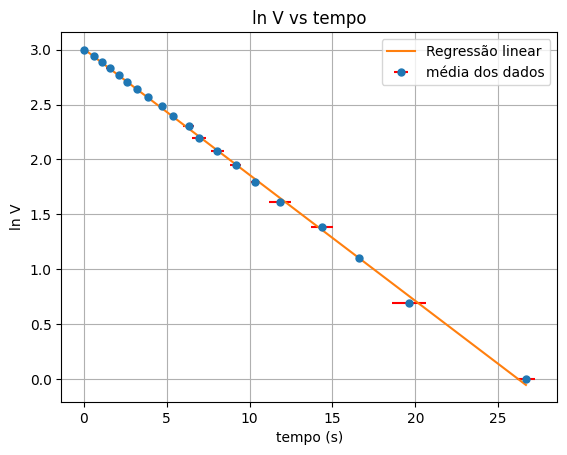

In [156]:
# tempo = tempo.reshape(-1,1)
plt.errorbar(tempo.flatten(),np.log(volts).flatten(),xerr=mediaerr.flatten(),fmt='o',markersize=5,ecolor='red',label="média dos dados")
plt.plot(tempo,model1.predict(tempo),label="Regressão linear")
plt.title("ln V vs tempo")
plt.ylabel("ln V")
plt.xlabel("tempo (s)")
plt.grid()
plt.legend()

In [157]:
print(f'coeficiente angular: {model1.coef_}')
print(f'coeficiente linear: {model1.intercept_}')
print(f'coeficiente de determinação (R²): {r2_score(np.log(volts),model1.predict(tempo))}')

coeficiente angular: [-0.11483933]
coeficiente linear: 3.0077387856433795
coeficiente de determinação (R²): 0.9990849722665431


In [173]:
dados.std(axis=1)

20    0.000000
19    0.130652
18    0.194551
17    0.206954
16    0.149766
15    0.200873
14    0.192172
13    0.104642
12    0.136088
11    0.104976
10    0.345572
9     0.432412
8     0.382923
7     0.338821
6     0.288149
5     0.639711
4     0.640960
3     0.145499
2     1.040466
1     0.531018
dtype: float64